In [14]:
from cnn_model_1 import EmotionRecognition

In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [18]:
train_loader = torch.load('train_dataloader.pth')
test_loader = torch.load('test_dataloader.pth')

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_871552\3212086309.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_loader = torch.load('train_dataloader.pth')
C:\Use

In [17]:
model = EmotionRecognition().to(device)

In [18]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for e in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {e+1}/{num_epochs}", ncols=100):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)  # Get the index of the max probability (class)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    print(f"Epoch [{e+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/10: 100%|█████████████████████████████████████████████████| 449/449 [05:33<00:00,  1.35it/s]


Epoch [1/10], Loss: 1.5156, Accuracy: 41.00%


Epoch 2/10: 100%|█████████████████████████████████████████████████| 449/449 [04:58<00:00,  1.50it/s]


Epoch [2/10], Loss: 1.2512, Accuracy: 52.24%


Epoch 3/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 19.95it/s]


Epoch [3/10], Loss: 1.0748, Accuracy: 59.22%


Epoch 4/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 20.00it/s]


Epoch [4/10], Loss: 0.8715, Accuracy: 67.81%


Epoch 5/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 20.01it/s]


Epoch [5/10], Loss: 0.6141, Accuracy: 78.09%


Epoch 6/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 20.03it/s]


Epoch [6/10], Loss: 0.3576, Accuracy: 87.83%


Epoch 7/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 20.00it/s]


Epoch [7/10], Loss: 0.1753, Accuracy: 94.90%


Epoch 8/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 20.03it/s]


Epoch [8/10], Loss: 0.1018, Accuracy: 97.55%


Epoch 9/10: 100%|█████████████████████████████████████████████████| 449/449 [00:22<00:00, 19.78it/s]


Epoch [9/10], Loss: 0.0794, Accuracy: 98.20%


Epoch 10/10: 100%|████████████████████████████████████████████████| 449/449 [00:26<00:00, 16.86it/s]

Epoch [10/10], Loss: 0.0614, Accuracy: 98.80%


In [19]:
torch.save(model.state_dict(), 'emotion_recognition_model.pth')

In [10]:
from cnn_model_1 import EmotionRecognition

model = EmotionRecognition()
model.load_state_dict(torch.load('emotion_recognition_model.pth'))
model.to(device)


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_871552\665489952.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('emotion_recognition_mod

EmotionRecognition(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=7, bias=True)
)

In [16]:
import matplotlib.pyplot as plt

def imshow_grayscale(img):
    img = img.clone().cpu()  # clone to avoid changing original
    img = img * 0.5 + 0.5    # unnormalize: x * std + mean
    img = img.squeeze(0)     # remove channel dimension (1, H, W) → (H, W)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

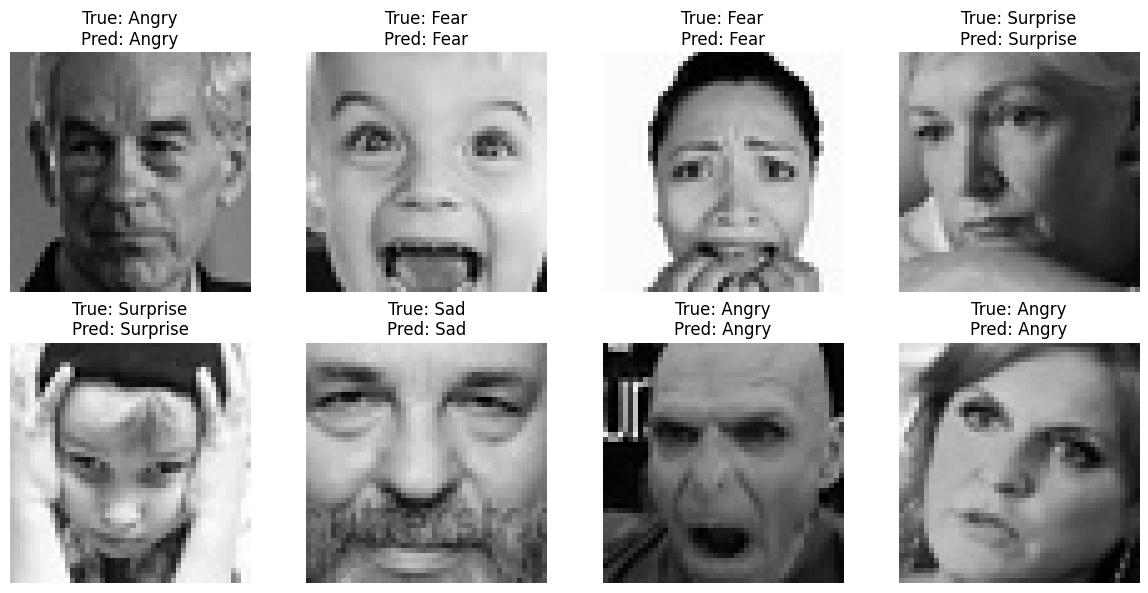

In [20]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

model.eval()
dataiter = iter(train_loader)
images, labels = next(dataiter)

images = images.to(device)
labels = labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

plt.figure(figsize=(12, 6))
for idx in range(8):
    img = images[idx].cpu() * 0.5 + 0.5  # unnormalize: x * std + mean
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 4, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {emotion_labels[labels[idx]]}\nPred: {emotion_labels[predicted[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 4. Accuracy & report
acc = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=emotion_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


Test Accuracy: 55.04%

Classification Report:
              precision    recall  f1-score   support

       Angry       0.43      0.44      0.44       958
     Disgust       0.74      0.46      0.57       111
        Fear       0.44      0.44      0.44      1024
       Happy       0.76      0.72      0.74      1774
         Sad       0.45      0.57      0.50      1233
    Surprise       0.44      0.38      0.41      1247
     Neutral       0.73      0.69      0.71       831

    accuracy                           0.55      7178
   macro avg       0.57      0.53      0.54      7178
weighted avg       0.56      0.55      0.55      7178


Confusion Matrix:
[[ 423    3  117   81  155  145   34]
 [  27   51    6    2   13   11    1]
 [ 133    4  447   66  129  161   84]
 [ 102    1   58 1277  212   85   39]
 [ 105    3  106  112  699  182   26]
 [ 149    5  192  102  289  477   33]
 [  44    2   86   46   55   21  577]]
